# Introduction


## 1. Domain-specific area


Social Media has changed the way businesses interact with their customers forever. In a matter of minutes, thousands of posts could be trending on Twitter. Being able to analyze tweets in real-time, and determine the sentiment that underlies each would be utterly beneficial for a business. 

Nowadays online reputation is one of the most valuable assets of a brand. A bad review or mistake on social media can be costly if not solved quickly. Twitter sentiment analysis allows a business to keep track of what is being said about the company, a product, or service and can help detect negative sentiment and the reason behind it. Detecting negative trends or angry customers fast is important to deescalate the situation and avoid further negative mentions. 

But twitter sentiment analysis can not only contribute towards brand monitoring, but it can also gain insight into the preferences of the customers (Pascual 2019). Getting reviews and feedback from customers is extremely valuable for companies. With feedback, companies can change their product or service more to the liking of their customers. Today it is way more convenient for people to tweet about their satisfaction or dissatisfaction about a certain service or product instead of leaving a review on the companies’ website.

Therefore, using Twitter sentiment analysis, businesses can scan through thousands of reviews and determine what aspects need to be improved on and what they are doing well. Analyzing tweets can be challenging because tweets are not meant to be well-written reviews with a clear structure and a well summarized thought process but tweets are a rather casual expression of an individual’s thoughts, limited to 140 characters.

Furthermore, tweets often have spelling errors and include emoticons, which makes the task even more challenging (Go et al. 2009). In conclusion, Sentiment analysis helps a business monitor customers’ emotions on social media and makes the business understand how they feel. It adds an extra layer to the traditional metrics used to analyze the performance of brands on social media and provides businesses with powerful opportunities.

Businesses could sort data by sentiment manually, but since social media moves so fast and thousands of customers could engage in a matter of minutes this task needs to be automated.   Sentiment analysis needs to be fast, and scalable, so it can provide consistent results with a high level of accuracy (Pascual 2019).


## 2. Dataset



The dataset used for this coursework was found on Kaggle and is called ‘Twitter US Airline Sentiment’ (source: https://www.kaggle.com/crowdflower/twitter-airline-sentiment)

This data originally came from ‘Crowdflower's Data for Everyone library’, which I, unfortunately, cannot access. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

The data provided on Kaggle is a slightly reformatted version of the source. It includes both a CSV file and an SQLite database. The dataset used in the CW, ‘Tweets.csv” is available for download as a CSV file and is  3.42 MB big.

The CSV contains tweets directed at six different American airlines and the contributors have manually classified the tweets.
The columns are:

Tweet id: A number to identify the tweet

Airline sentiment: either positive, neutral or negative

Airline sentiment confidence: A number ranging from 0 to 1, 1 means full confidence in sentiment classification.

Negative reason: the reason why sentiment was negative

Negative reason confidence: Same confidence score as airline sentiment confidence but about the negative reason

Airline: Which airline did the tweet mention/referenced

Airline sentiment gold: A lot of missing values, not clear what does columns is supposed to tell

Name: Name of the Twitter user without “@” handle

The negative reason gold: A lot of missing values, not clear what does columns is supposed to tell

Retweet count: The number of times the tweet has been retweeted

Text: The actual text of the tweet

Tweet cord: A lot of missing values, not clear what does columns is supposed to tell

The tweet created: Timestamp of when the tweet was created

Tweet Location: A lot of missing values, supposed to tell where the tweet was created

User timezone: In what timezone user was when tweeting the tweet

In total there are 14640 rows and 14 columns.
For this coursework only relevant columns will be used which are: Tweet id (dtype: numpy.int 64), airline sentiment (dtype: string), airline sentiment confidence (dtype: numpy. float64) and text (dtype: string). 


## 3. Objectives of the project 


The main objective of this coursework is to successfully build a classifier that can predict the correct sentiment of a given tweet. If a classifier can correctly identify tweets with a 90% accuracy score or above, that would be good enough to potentially contribute to the problem area. 

But I also want to show that different approaches in text preprocessing lead to different results. 
Optimizing and choosing the right approach for preprocessing the raw data and the text is of utmost importance to get satisfying results. 

This coursework can potentially contribute to showing the right/best approach for text and data preprocessing. Two different approaches for text processing will be used and therefore the better approach will have the higher accuracy score.

In Section 2.2 of “Twitter Sentiment Classification using Distant Supervision“ from (Go et al. 2009), they discuss the impact of emoticons or emojis when classifying tweets. Emoticons or emojis are nowadays commonly used by Twitter users. In the referenced work they identify emojis as noise and therefore remove them from the training data.

In my opinion, emojis can confirm a sentiment like: “I loved your customer service: heart_eyes: (😍)”. In this example, the sentiment would have been obvious without the emoji but especially when Twitter users use sarcasm, emojis can be highly valuable to identify the true sentiment of a tweet. For example: “Great customer service: face_with_rolling_eyes (🙄)”. In this case, the emoji confirms that the tweet was meant to be sarcastic. Removing the emoji would make the rest of the text seem like the tweet was meant to be positive. 

In this coursework, a python library to decode emojis will be used to identify sentiment even better. So, another objective is to show that emojis are valuable in sentiment analysis and that better results can be achieved when decoding and using emoji language. Unfortunately, most of the tweets do not contain emojis so it will be difficult to gauge whether this approach makes sense/is good.

Futhermore for a business it would be almost useless to know if certain tweets have negative or positive sentiment, if the reason as to why is not discovered. That’s why the last objective of this coursework is to create and train a classifier that can predict the correct reason as to why a tweet was negative. A highly accurate classifier could potentially contribute towards improving twitter sentiment analysis.

## 4. Evaluation methodology 


For evaluation, the scikit-learn function ‘classification report’ will be used, which shows precision, recall, f1-score, and the accuracy of a classifier. A confusion matrix will also be shown. 

As mentioned above, negative reviews or trends online can ruin a brand and drive away potential customers. For businesses, it is more important to reduce and minimize negative press than to improve positive reviews. That’s why I will pay particular attention to the number of falsely predicted tweets that are classified as negative. If the number of actual negative tweets which were not correctly classified is low, the result is satisfying.The metric I will look at in this case is 'Recall' for the negative label. The recall should be as high as possible for a satisyfing result. 

Since I also want to show the difference in what impact preprocessing the text has, a total of 3 classifiers will be built and trained for each preprocessing approach:

    1.	The very baseline Naïve Bayes classifier
    
    2.	The more improved Multinominal Naïve Bayes classifier
    
    3.	The Random Forest classifier
    
All 3 of those classifiers will be trained and tested with the basic text process function and evaluation metrics will be gathered. Then all 3 classifiers will be trained and tested using the more optimized process text function to gauge the difference in performance from a text pre-processing angle.

At last, the metrics of the classifiers will be compared, and I expect the Random Forest classifier to perform the best out of all 3 because the classifier consists of a large number of individual decision trees that operate as an ensemble. Each tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models (Yiu 2019).



# Implementation

In [1]:
# Importing libraries and printing used version
import pandas as pd
import emoji
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
import re
import string
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.util import ngrams
from nltk.tokenize import RegexpTokenizer
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

# downloading stopwords and wordnet
nltk.download('stopwords')
nltk.download('wordnet')


print('Pandas: {}'.format(pd.__version__))
print('emoji: {}'.format(emoji.__version__))
print('scikit-learn: {}'.format(sklearn.__version__))
print('nltk: {}'.format(nltk.__version__))
print('re: {}'.format(re.__version__))

Pandas: 1.3.4
emoji: 1.6.1
scikit-learn: 0.24.2
nltk: 3.6.5
re: 2.2.1


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mohrj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mohrj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Loading the csv file into a pandas  dataframe
data = pd.read_csv('Airline dataset.csv')

data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


Now that the data is in a pandas data frame the data will be explored thoroughly below:

In [3]:
# Exploring how the text data looks like
print(data.text[0])
print(data.text[1])
print(data.text[2])
print(data.text[3])
print(data.text[4])

@VirginAmerica What @dhepburn said.
@VirginAmerica plus you've added commercials to the experience... tacky.
@VirginAmerica I didn't today... Must mean I need to take another trip!
@VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse
@VirginAmerica and it's a really big bad thing about it


In [4]:
# using pandas value counts function to see how many values of each confidence score are present in the dataframe
data.airline_sentiment_confidence.value_counts()

1.0000    10445
0.6667       71
0.6632       35
0.6596       30
0.6559       30
          ...  
0.3674        1
0.6155        1
0.3708        1
0.6905        1
0.3487        1
Name: airline_sentiment_confidence, Length: 1023, dtype: int64

In [5]:
#creating new dataframe with only the relevant columns

df = pd.concat([data.tweet_id, data.airline_sentiment,data.airline_sentiment_confidence, data.text], axis = 1)

In [6]:
# New dataframe with improved column names
df.columns = ['id', 'sentiment','confidence', 'text']
df

,id,sentiment,confidence,text
0,570306133677760513,neutral,1.0000,@VirginAmerica What @dhepburn said.
1,570301130888122368,positive,0.3486,@VirginAmerica plus you've added commercials t...
2,570301083672813571,neutral,0.6837,@VirginAmerica I didn't today... Must mean I n...
3,570301031407624196,negative,1.0000,@VirginAmerica it's really aggressive to blast...
4,570300817074462722,negative,1.0000,@VirginAmerica and it's a really big bad thing...
...,...,...,...,...
14635,569587686496825344,positive,0.3487,@AmericanAir thank you we got on a different f...
14636,569587371693355008,negative,1.0000,@AmericanAir leaving over 20 minutes Late Flig...
14637,569587242672398336,neutral,1.0000,@AmericanAir Please bring American Airlines to...
14638,569587188687634433,negative,1.0000,"@AmericanAir you have my money, you change my ..."


In [7]:
#Interested in difference in confidence, printing 5 rows each for confidence < 0.5 and 5 rows for confidencce = 1

df[df['confidence'] < 0.5].head().apply(lambda row:print(row['sentiment'],row['confidence'],row['text']), axis = 1)
df[df['confidence'] == 1].head().apply(lambda row:print(row['sentiment'],row['confidence'],row['text']), axis = 1)

positive 0.3486 @VirginAmerica plus you've added commercials to the experience... tacky.
positive 0.3482 @VirginAmerica come back to #PHL already. We need you to take us out of this horrible cold. #pleasecomeback http://t.co/gLXFwP6nQH
neutral 0.355 @VirginAmerica Can you find us a flt out of LAX that is sooner than midnight on Monday? That would be great customer service 😃
positive 0.3579 😎 RT @VirginAmerica: You’ve met your match. Got status on another airline? Upgrade (+restr): http://t.co/RHKaMx9VF5. http://t.co/PYalebgkJt
neutral 0.375 @VirginAmerica is saving my sanity right now: http://t.co/ELtBOLjUl9
neutral 1.0 @VirginAmerica What @dhepburn said.
negative 1.0 @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse
negative 1.0 @VirginAmerica and it's a really big bad thing about it
negative 1.0 @VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.
it's really the only bad 

0    None
3    None
4    None
5    None
9    None
dtype: object

As seen above some of the tweets with low confidence score are hard to interpret, wich is why I chose to remove all rows in which the confidence score was not 1.

In [8]:
# removing every row where confidence in sentiment is not at 1, which is the maximum
df = df[df.confidence == 1]

In [9]:
# Seeing how many rows of each sentiment are left in the df
df.sentiment.value_counts()

negative    7382
neutral     1548
positive    1515
Name: sentiment, dtype: int64

In [10]:
# resetting the index and removing confidence column
df = df.reset_index(drop=True)
df = df.drop('confidence', 1)
df

C:\Users\mohrj\AppData\Local\Temp/ipykernel_11716/3670222157.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('confidence', 1)


,id,sentiment,text
0,570306133677760513,neutral,@VirginAmerica What @dhepburn said.
1,570301031407624196,negative,@VirginAmerica it's really aggressive to blast...
2,570300817074462722,negative,@VirginAmerica and it's a really big bad thing...
3,570300767074181121,negative,@VirginAmerica seriously would pay $30 a fligh...
4,570295459631263746,positive,"@VirginAmerica it was amazing, and arrived an ..."
...,...,...,...
10440,569588464896876545,negative,@AmericanAir thx for nothing on getting us out...
10441,569587705937600512,negative,@AmericanAir my flight was Cancelled Flightled...
10442,569587371693355008,negative,@AmericanAir leaving over 20 minutes Late Flig...
10443,569587242672398336,neutral,@AmericanAir Please bring American Airlines to...


Below, I checked how the emoji library turns emojs into text:

In [11]:
print(df.text[10])

I ❤️ flying @VirginAmerica. ☺️👍


In [12]:
b = df.text[10]
print(emoji.demojize(b))

I :red_heart: flying @VirginAmerica. :smiling_face::thumbs_up:


In [13]:
#check for any missing  values
df.isnull().sum()

id           0
sentiment    0
text         0
dtype: int64

As mentioned in the introduction, the best way to preprocess text will be identified. Thats why there are 2 different process_text functions: The basic process_text_basic and the process_text_MB function.

In Lecture 5.201: Introduction to sentiment analysis, the lecturer explains the basic approach for sentiment classification using the naive bayes algorithm. The process_text_basic function basically represents this basic approach and prepares the text for the tf-idf vectorizer and serves as a baseline for this coursework.

In comparison to this baseline, the process_text_MB function does everything the basic function does like removing punctuation, etc. but also has 3 optimizations:

    1.	Turning emojis into text for better sentiment analysis

    2.	Add Not_ to every word after a negation until the next punctuation

    3.	Occurrence matters more than frequency -> Tokens occurring more than once will be removed
    
In both functions the twitter handle, any html links, stopwords and punctuations will be removed so the text is clean and not noisy.

Afterwards the whole text will be converted to lowercase aswell as lemmatized and tokenized. 
The goal of lemmatization is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base.

The decontracted function will be used to decontracte words like "can't" into "can not" so the above mentioned Step 2 can be properly applied.

At first the basic text process function will be used to preprocess the text and the classifiers will be built and evaluted. 

Then after resetting the changes to the data, the improved text process function will be applied to the dataframe and used to build and train the classifiers.




In [14]:
# Preprocess the text so it is usable for td-idf 

# Source for decontracted function : https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
# Words like "would've" would be "would ve" after removing puncuation so I think  it is necessary to decontracte the words first
# There is also a contractions library for python but I  had several errors trying to install, while the solution below is far from perfect it will be better than nothing!
def decontracted(phrase):

    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase



def  process_text_basic(text):
    #removing twitter handle with Regex
    text = re.sub(r'@\S*\s','',text)
    #removing any html links like 'https..'
    url = re.compile(r'https?://\S+|www\.\S+')
    text = url.sub(r'', text)
    #removing punctuation
    exclude = set(string.punctuation)
    text = ''.join(ch for ch in text if ch not in exclude)
    #converting to lowercase
    text =  text.lower()
    #removing stopwords
    text = ' '.join([word for word in text.split() if word not in (stopwords.words('english'))])
    #tokenizing the text
    text = nltk.word_tokenize(text)
    #lemmatizing
    wnl = WordNetLemmatizer()
    text = [wnl.lemmatize(word) for word in text]
    return text



     


In [15]:
#The optimized process_text function


def  process_text_MB(text):
    
    #removing twitter handle with Regex
    text = re.sub(r'@\S*\s','',text)
    
    #removing any html links like 'https..'
    url = re.compile(r'https?://\S+|www\.\S+')
    text = url.sub(r'', text)
    
    #turn emojis into text with emjo library, e.g. I ❤️ flying @VirginAmerica. ☺️👍 ->  I :red_heart: flying @VirginAmerica. :smiling_face::thumbs_up:
    text = emoji.demojize(text)
    #converting to lowercase
    text =  text.lower()

    #removing stopwords but leaving 'not', this could be expaneded to never, no, not for negation detection
    text = ' '.join([word for word in text.split() if word not in (stopwords)])
    
    #Simple baseline method: add NOT_ to every word between negation and following punctuation
    # source : https://coderedirect.com/questions/368359/how-to-add-tags-to-negated-words-in-strings-that-follow-not-no-and-never
    text = re.sub(r'(?:not|never|no)[\w\s]+[^\w\s]', 
          lambda match: re.sub(r'(\s+)(\w+)', r'\1not_\2', match.group(0)), 
        text,
      flags=re.IGNORECASE)
    #removing punctuation
    exclude = set(string.punctuation)
    text = ''.join(ch for ch in text if ch not in exclude)

    #tokenizing the text
    text = nltk.word_tokenize(text)
    
    #lemmatizing
    wnl = WordNetLemmatizer()
    text = [wnl.lemmatize(word) for word in text]
    #Getting unique tokens, Lecture 5.201, occurence matters more than frequency
    text = set(text)
    text = list(text)
    return text

Now that the 2 different text processing functions have been introduced, the basic approach will be applied and the classifiers will be built and tested.

In [16]:
#Applying the decontracted  function to every row in the text column of the dataframe with a lambda function  
df.text = df.text.apply(lambda y: decontracted(y))
#Applying the process text function to every row in the text column of the dataframe with a lambda function    
df.text = df.text.apply(lambda x: (process_text_basic(x)))

Below the TF-IDF Countvecotirzer and TFidf transformer from scitkit learn will be used.

Every row of the dataframe.text column was processed with the lamba function above and consists of a list of tokens now.

So the corpus is every token in the whole text column of the dataframe. This corpus gets transformed into a bag of words and the tfidf will be calculated for every token.

In [17]:
# Using TF-IDF Vectorizer to transform tokens into 1s and 0s
vectorizer = CountVectorizer(analyzer=lambda x: x)
corpus = df.text
bow = vectorizer.fit_transform(corpus)

transformer = TfidfTransformer()
text_tfidf = transformer.fit_transform(bow)
text_tfidf = text_tfidf.toarray()

In [18]:
# Seeing how many rows of each sentiment are left in the df
print(df.sentiment.value_counts())

negative    7382
neutral     1548
positive    1515
Name: sentiment, dtype: int64


In [19]:
#Because of this imbalance training data will be smoothed using the SMOTE function 
smote = SMOTE()
x_sm,y_sm = smote.fit_resample(text_tfidf,df.sentiment)

In [20]:
#Train/test split
Y = df.sentiment
X_train, X_test, y_train, y_test = train_test_split(
     x_sm, y_sm, test_size=0.33, random_state=42)

In [21]:
#Create and train Naive Bayes classifier, which will serves as the  baseline for this CW
nb = GaussianNB()
nb.fit(X_train, y_train)
#Predict on test set
nb_prediction = nb.predict(X_test)
#Get accuary score and classification report for evalutation
nb_result = classification_report(y_test, nb_prediction)
print(accuracy_score(nb_prediction,y_test))
print(nb_result)

0.8203584621699275
              precision    recall  f1-score   support

    negative       0.98      0.66      0.79      2480
     neutral       0.82      0.81      0.82      2398
    positive       0.74      0.99      0.84      2431

    accuracy                           0.82      7309
   macro avg       0.85      0.82      0.82      7309
weighted avg       0.85      0.82      0.82      7309



In [22]:
#Create and train Multinomial Naive Bayes classifier
nb_MB = MultinomialNB()
nb_MB.fit(X_train,y_train)
#Predict on test set
nbMB_prediction =  nb_MB.predict(X_test)
#Get accuary score and classification report for evalutation
nb_MB_result = classification_report(y_test, nbMB_prediction)
print(accuracy_score(nbMB_prediction,y_test))
print(nb_MB_result)

0.8916404432890956
              precision    recall  f1-score   support

    negative       0.85      0.90      0.87      2480
     neutral       0.91      0.83      0.86      2398
    positive       0.93      0.94      0.94      2431

    accuracy                           0.89      7309
   macro avg       0.89      0.89      0.89      7309
weighted avg       0.89      0.89      0.89      7309



In [23]:
#Create and train Random Forest classifier
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,y_train)
#Predict on test set
random_forest_classifier_prediction =  random_forest_classifier.predict(X_test)
#Get accuary score and classification report for evalutation
RF_result = classification_report(y_test, random_forest_classifier_prediction)
print(accuracy_score(random_forest_classifier_prediction,y_test))
print(RF_result)

0.9217403201532357
              precision    recall  f1-score   support

    negative       0.94      0.87      0.90      2480
     neutral       0.88      0.96      0.91      2398
    positive       0.96      0.94      0.95      2431

    accuracy                           0.92      7309
   macro avg       0.92      0.92      0.92      7309
weighted avg       0.92      0.92      0.92      7309



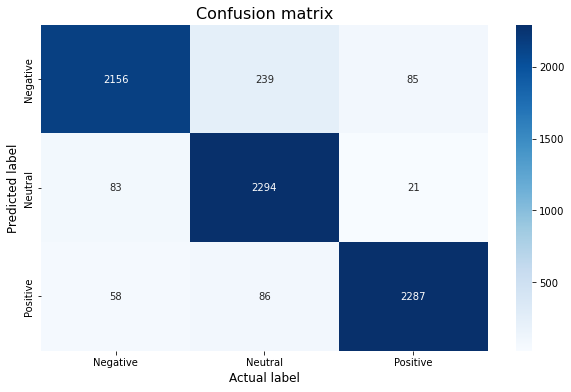

In [24]:
#plot confusion matrix for random forest classifier
cm = confusion_matrix(y_test,random_forest_classifier_prediction)

plt.figure(figsize=(10,6))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()

For the basic approach results have been achieved. 

The Random Forest classifier has already a high accuray score of almost 92% and only labeled 51 actual negative tweets wrongly. It is already a satisfiying result. 

Below the dataframe will be 'reset' because the process_text_basic function has been applied to the whole dataframe.

Then all the steps above will be repeated with the optimized process text function.

In [25]:
#Resetting the data
data = pd.read_csv('Airline dataset.csv')
df = pd.concat([data.tweet_id, data.airline_sentiment,data.airline_sentiment_confidence, data.text], axis = 1)
df.columns = ['id', 'sentiment','confidence', 'text']
df = df[df.confidence == 1]
df = df.reset_index(drop=True)
df = df.drop('confidence', 1)

#Removing not from stopwords list, because it is needed to add Not_ after every negation
stopwords = stopwords.words('english')
stopwords.remove('not')

C:\Users\mohrj\AppData\Local\Temp/ipykernel_11716/3985424185.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('confidence', 1)


In [26]:
#Applying the decontracted  function to every row in the text column of the dataframe with a lambda function  
df.text = df.text.apply(lambda y: decontracted(y))
#Applying the process text function to every row in the text column of the dataframe with a lambda function    
df.text = df.text.apply(lambda x: (process_text_MB(x)))

In [27]:
# Using TF-IDF Vectorizer to transform tokens into 1s and 0s
vectorizer = CountVectorizer(analyzer=lambda x: x)
corpus = df.text
bow = vectorizer.fit_transform(corpus)

transformer = TfidfTransformer()
text_tfidf = transformer.fit_transform(bow)
text_tfidf = text_tfidf.toarray()

#Because of this imbalance training data will be smoothed using the SMOTE function 
smote = SMOTE()
x_sm,y_sm = smote.fit_resample(text_tfidf,df.sentiment)

#Train/test split
Y = df.sentiment
X_train, X_test, y_train, y_test = train_test_split(
     x_sm, y_sm, test_size=0.33, random_state=42)

In [28]:
#Create and train Naive Bayes classifier
nb_improved = GaussianNB()
nb_improved.fit(X_train, y_train)
#Predict on test set
nb_prediction_improv = nb_improved.predict(X_test)
#Get accuary score and classification report for evalutation
nb_improv_result = classification_report(y_test, nb_prediction_improv)
print(accuracy_score(nb_prediction_improv,y_test))
print(nb_improv_result)

0.8548365029415789
              precision    recall  f1-score   support

    negative       0.98      0.73      0.84      2480
     neutral       0.86      0.84      0.85      2398
    positive       0.78      0.99      0.87      2431

    accuracy                           0.85      7309
   macro avg       0.87      0.86      0.85      7309
weighted avg       0.87      0.85      0.85      7309



In [29]:
#Create and train Multinomial Naive Bayes classifier
nb_MB_improv = MultinomialNB()
nb_MB_improv.fit(X_train,y_train)
#Predict on test set
nbMB_prediction_improv =  nb_MB_improv.predict(X_test)
#Get accuary score and classification report for evalutation
nb_MB_improv_result = classification_report(y_test, nbMB_prediction_improv)
print(accuracy_score(nbMB_prediction_improv,y_test))
print(nb_MB_improv_result)

0.9098371870296894
              precision    recall  f1-score   support

    negative       0.90      0.90      0.90      2480
     neutral       0.91      0.87      0.89      2398
    positive       0.92      0.96      0.94      2431

    accuracy                           0.91      7309
   macro avg       0.91      0.91      0.91      7309
weighted avg       0.91      0.91      0.91      7309



In [30]:
#Create and train Random Forest classifier
random_forest_classifier_improv = RandomForestClassifier()
random_forest_classifier_improv.fit(X_train,y_train)
#Predict on test set
random_forest_classifier_prediction_improv =  random_forest_classifier_improv.predict(X_test)
#Get accuary score and classification report for evalutation
RF_improv_result = classification_report(y_test, random_forest_classifier_prediction_improv)
print(accuracy_score(random_forest_classifier_prediction_improv,y_test))
print(RF_improv_result)

0.9333698180325626
              precision    recall  f1-score   support

    negative       0.94      0.89      0.91      2480
     neutral       0.90      0.95      0.92      2398
    positive       0.96      0.96      0.96      2431

    accuracy                           0.93      7309
   macro avg       0.93      0.93      0.93      7309
weighted avg       0.93      0.93      0.93      7309



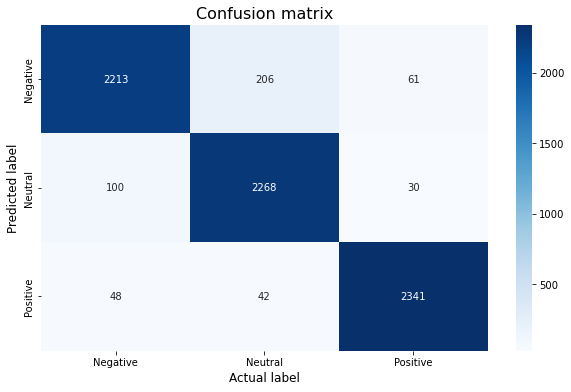

In [31]:
#plot confusion matrix for random forest classifier
cm = confusion_matrix(y_test,random_forest_classifier_prediction_improv)

plt.figure(figsize=(10,6))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()

In [32]:
#Comparing the classification reports for all 6 classifiers
print(nb_result, nb_MB_result, RF_result)
print(nb_improv_result,nb_MB_improv_result,RF_improv_result)

              precision    recall  f1-score   support

    negative       0.98      0.66      0.79      2480
     neutral       0.82      0.81      0.82      2398
    positive       0.74      0.99      0.84      2431

    accuracy                           0.82      7309
   macro avg       0.85      0.82      0.82      7309
weighted avg       0.85      0.82      0.82      7309
               precision    recall  f1-score   support

    negative       0.85      0.90      0.87      2480
     neutral       0.91      0.83      0.86      2398
    positive       0.93      0.94      0.94      2431

    accuracy                           0.89      7309
   macro avg       0.89      0.89      0.89      7309
weighted avg       0.89      0.89      0.89      7309
               precision    recall  f1-score   support

    negative       0.94      0.87      0.90      2480
     neutral       0.88      0.96      0.91      2398
    positive       0.96      0.94      0.95      2431

    accuracy        

At last, the dataframe will be reset again to build a classifier which will predict the reason as to why a tweet was negative

In [33]:
#Resetting dataframe but using different columns now, like negativereason to get the reason
data = pd.read_csv('Airline dataset.csv')
df = pd.concat([data.tweet_id, data.airline_sentiment,data.airline_sentiment_confidence, data.text, data.negativereason], axis = 1)
df.columns = ['id', 'sentiment','confidence', 'text', 'reason']
df = df.dropna(axis = 0)
# getting rid of every row where reason is not stated
df = df[df.reason != "Can't Tell"]
# resetting the index and removing confidence column
df = df.reset_index(drop=True)
df = df.drop('confidence', 1)
#Applying the decontracted  function to every row in the text column of the dataframe with a lambda function  
df.text = df.text.apply(lambda y: decontracted(y))
#Applying the process text function to every row in the text column of the dataframe with a lambda function    
df.text = df.text.apply(lambda x: (process_text_MB(x)))
#TF-IDF again
corpus = df.text
bow = vectorizer.fit_transform(corpus)
transformer = TfidfTransformer()
text_tfidf = transformer.fit_transform(bow)
text_tfidf = text_tfidf.toarray()

C:\Users\mohrj\AppData\Local\Temp/ipykernel_11716/2538437019.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('confidence', 1)


In [34]:
#Train/Test split
Y = df.reason
X_train, X_test, y_train, y_test = train_test_split(
     text_tfidf,Y, test_size=0.2, random_state=3)

#Building and testing RF classifier to predict reason
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,y_train)
random_forest_classifier_prediction =  random_forest_classifier.predict(X_test)
results = pd.DataFrame(data=random_forest_classifier_prediction, columns=["prediction"])
print(accuracy_score(random_forest_classifier_prediction,y_test))

0.6320400500625782


In [35]:
#Reverting the TF-IDF array into text
text = vectorizer.inverse_transform(X_test)
#Creating result dataframe to see the actual label, predicted label and text that was given to classifier
a = results
y_test = y_test.reset_index()
y_test['result'] = a
y_test.drop(columns="index", inplace=True)
y_test.columns  = ["Label", "Prediction"]
results = y_test
results['text'] = text
results

,Label,Prediction,text
0,Lost Luggage,Lost Luggage,"[baggage, claim, going, newarktiredandwanttogo..."
1,Late Flight,Late Flight,"[descending, farce, flight, get, going, not, n..."
2,Cancelled Flight,Cancelled Flight,"[cancelled, decided, drive, eventually, flight..."
3,Late Flight,Late Flight,"[houston, not, notconditions, notdestination, ..."
4,Flight Attendant Complaints,Lost Luggage,"[bag, carry, easily, fit, let, loyal, not, ove..."
...,...,...,...
1593,Customer Service Issue,Customer Service Issue,"[airline, customer, get, inferior, nation, nat..."
1594,Customer Service Issue,Cancelled Flight,"[answer, cancelled, dm, employee, flighted, ha..."
1595,Flight Booking Problems,Customer Service Issue,"[account, added, elevate, excited, first, flig..."
1596,Customer Service Issue,Customer Service Issue,"[2, already, another, anything, could, first, ..."


# III. Conclusions

## 9. Evaluation

Because the test and train data is selected randomly at every run of this code, results may vary some percent.

The baseline Naive Bayes Classifier achieved a Recall of 0.66 for negative labeled tweets and an accuracy score of 82%. 

The Random Forest Classifier achieved a Recall of 0.89 for negative labeled tweets and has an accuracy score of 93%. 

One of the main objectives for this classifier was to have a high recall on negative labeled tweets, so a business can identify all negative tweets and act on the problems/complaints of the costumers. 

The RF classifier find 90% of all negative labeled tweets which is way higher than the baseline but could still be better. When a user on twitter complains about a product or service and the tweet goes viral, the brand/company will be damaged forever. This damage limitation is crucial that’s why a high recall is crucial. 

The Classifier buit to predict the negative reason did not do as well with an accuracy score of 62%. Since any reason for a negative tweet is bad, there is no need to make a distinction between ‘Lost Luggage’ or ‘Costumer Service’.

In conclusion the results achieved by the random forest classifier are still pretty satisfying, beating the baseline handily, accurately predicting the labels and having a high recall rate on negative labeled tweets.


## 10. Evaluation of the project and its results

In general, the project was a success. 
The results clearly show that the optimized pre-processing steps lead to improved results, which was one of the objectives.

Furthermore, did the Random Forest classifier perform quite well with roughly 93% accuracy score and 89% recall of negative tweets, which beat the baseline by quite some bit. 

The classifier or this approach in general could easily work with a bigger dataset, so this approach is scalable. Only runtime could become a problem if the input data becomes too big, as the Random Forest classifier already takes up much memory and runtime.

The classifier which should predict the negative reason was not that great with an accuracy score of only about 62%, but it also had a much more complex task then just classifying the sentiment. 

The general approach of this project can be reproduced and applied to different sentiment classification challenges not just twitter sentiment analysis. 

As discussed in Lecture 5.201, another approach to sentiment analysis is to use some kind of sentiment lexicon, which would be a manually curated word list. 

For businesses this approach might make sense if their costumers on twitter use special words or definitions.

For future work, it would be interesting to have a dataset where every tweet contains emojis. As mentioned in the objective statement, emojis could contribute to detecting sarcasm or irony and are commonly used among twitter users.


## Publication bibliography

Go, Alec; Bhayani, Richa; Huang, Lei (2009): Twitter Sentiment Classification using Distant Supervision. Available online at https://d1wqtxts1xzle7.cloudfront.net/34632156/Twitter_Sentiment_Classification_using_Distant_Supervision-with-cover-page-v2.pdf?Expires=1640780630&Signature=JBWweSyVDV6bthq0makhR62ffzECjxzlFq3reXoAHNlwFMJyh7e~mXnqD8wDsQKu5yPyHtUpziPrkWKPNKMNsx--TK-2~G6~FDpxv8Q0~l~A6FUgIKPtNdi~tkrTazeDQT7Tcdwvp308HxpP70I0ggOH3~YlGecwmiztuYMDA1BbQChI4oRyyfmfOCJtqaOEvFTsFQEJKhXTM3erHRtqxFHGNPtP-r3LIyM4LyCpMZUxuQBgv1v~DdFACAdC0thWsvSlF8lK8rsBdPr8Q4NyxMDR50Dlgebg6KLYAw7sw5bl-h5RBQMbgcgQ0AHGd05IFDrA8vpO2E~8AIT83wpZRg__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA, checked on 12/29/2021.
Pascual, Federico (2019): Twitter Sentiment Analysis in Real-Time. Available online at https://monkeylearn.com/blog/sentiment-analysis-of-twitter/#:~:text=Twitter%20sentiment%20analysis%20allows%20you,mentions%20before%20they%20they%20escalate., checked on 12/29/2021.
You, Tony (2019): Understanding Random Forest. Available online at https://towardsdatascience.com/understanding-random-forest-58381e0602d2#:~:text=The%20Random%20Forest%20Classifier,-Random%20forest%2C%20like&text=In%20data%20science%20speak%2C%20the,between%20models%20is%20the%20key., checked on 12/30/2021.
